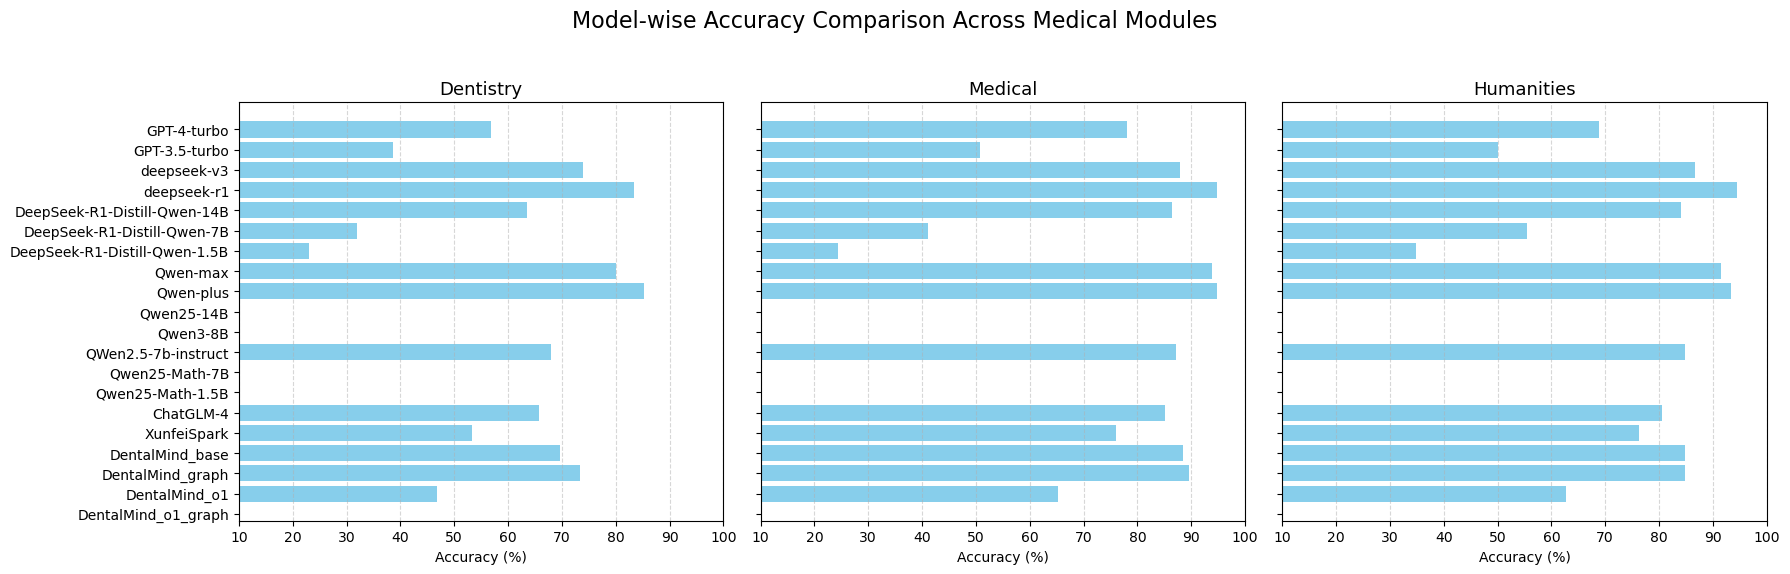

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# 模型英文显示顺序（和你希望的一致）
model_order = [
    "GPT-4-turbo", "GPT-3.5-turbo", "deepseek-v3", "deepseek-r1","DeepSeek-R1-Distill-Qwen-14B","DeepSeek-R1-Distill-Qwen-7B","DeepSeek-R1-Distill-Qwen-1.5B",
    "Qwen-max", "Qwen-plus","Qwen25-14B","Qwen3-8B",  "QWen2.5-7b-instruct", "Qwen25-Math-7B", "Qwen25-Math-1.5B","ChatGLM-4",
    "XunfeiSpark", "DentalMind_base","DentalMind_graph", "DentalMind_o1", "DentalMind_o1_graph"
]

# 读取数据
df = pd.read_excel("模型评估结果_最终版.xlsx", sheet_name=0)
df["科目"] = df["科目"].astype(str).str.strip().str.replace(r"\s+", "", regex=True)

# 提取模块
target_rows = ["口腔专业知识", "医学专业知识", "医学人文综合"]
df = df[df["科目"].isin(target_rows)]
df.set_index("科目", inplace=True)
df = df.drop(columns=["数量"])

# 转置：index=模型名
df = df.T

# ➕ 如果有缺的模型，比如 GraphRAG，还没评估数据，补 NaN 行
for model in model_order:
    if model not in df.index:
        df.loc[model] = [float("nan")] * df.shape[1]  # 插入空值行

# ✅ 按指定顺序重排行（即模型顺序）
df = df.loc[model_order]

# 绘图
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

modules = df.columns.tolist()
name_map = {"口腔专业知识": "Dentistry", "医学专业知识": "Medical", "医学人文综合": "Humanities"}

for i, module in enumerate(modules):
    axs[i].barh(df.index.tolist(), df[module] * 100, color='skyblue')
    axs[i].set_title(name_map[module], fontsize=13)
    axs[i].set_xlim(10, 100)
    axs[i].set_xlabel("Accuracy (%)")
    axs[i].invert_yaxis()
    axs[i].grid(axis='x', linestyle='--', alpha=0.5)

plt.suptitle("Model-wise Accuracy Comparison Across Medical Modules", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("objective_score_breakdown.png", dpi=300)
plt.show()
